# **Classification of celestial bodies using machine learning - Developer workspace**
Research paper



`Libraries`

In [ ]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

from google.colab import drive
drive.mount('/content/drive')


%matplotlib inline

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (10, 6)

#import warnings
#warnings.filterwarnings('ignore')
print(tf.__version__)
print("GPU Available:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2.15.0
GPU Available: False


`Galaxy zoo data set`

https://data.galaxyzoo.org/

https://ui.adsabs.harvard.edu/abs/2008MNRAS.389.1179L/abstract

https://zenodo.org/records/4573248

# Downloading and modifying the dataset
This aproach will use google drive so you will need about 50 GB of free space, you can also just download the dataset and run it from your local machine.

Also I suggest you that you download the dataset first from https://zenodo.org/records/4573248 and then upload it to this notebook.

Also I will be using only the first part of the dataset.

Meaning you will need:

*   gz_decals_auto_posteriors.csv
*   gz_decals_dr5_png_part1.zip

As mentioned before you do not need to store this dataset on Google Drive, but you will need to atleaste keep the same folder structure.

If you are going to use google drive you can do the installation only once.

<br>

**IMPORTANT**

YOU WOULD NEED TO DO THE INSTALLATION ONLY ONCE

In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Try to use this first.

**Also please be patient this could take a bit of time. ~45 min**

It is also much faster if you download the folder yourself and upload it to colab manualy.

In [ ]:
import os
import zipfile
from google.colab import drive

drive.mount('/content/drive')

# Specify the directory where the file will be downloaded and unzipped
directory_path = '/content/drive/MyDrive/research/data'


if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory created at {directory_path}")
else:
    print(f"Directory already exists at {directory_path}")


zip_file_path = f"{directory_path}/gz_decals_dr5_png_part1.zip"
!wget -O "{zip_file_path}" "https://zenodo.org/records/4573248/files/gz_decals_dr5_png_part1.zip?download=1"


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(directory_path)
print("Unzipping completed.")


os.remove(zip_file_path)
print("Zip file deleted.")


If the cell above did't correctly imported entiere dataset to your drive you should continue to next cell.

In [ ]:

import os
import zipfile

# Define the path to the zip file and the output directory
zip_path = '/content/drive/MyDrive/data/dataset/gz_decals_dr5_png_part1.zip' # Ensure path is correct
output_dir = '/content/unzipped_data' # Output directory within Colab environment


if not os.path.exists(output_dir):
    os.makedirs(output_dir)

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
    print("Unzipping completed successfully.")
except FileNotFoundError:
    print("The zip file was not found. Check the path.")
except Exception as e:
    print(f"An error occurred: {e}")


Mounted at /content/drive
Unzipping completed successfully.


BASIC INSTALLATION



---



In [ ]:
!wget https://zenodo.org/records/4573248/files/gz_decals_dr5_png_part1.zip?download=1 -O gz_decals_dr5_png_part1.zip

--2024-02-09 11:11:00--  https://zenodo.org/records/4573248/files/gz_decals_dr5_png_part1.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27789905885 (26G) [application/octet-stream]
Saving to: ‘gz_decals_dr5_png_part1.zip’

gz_decals_dr5_png_p 100%[===================>]  25.88G  23.8MB/s    in 19m 12s 

2024-02-09 11:30:13 (23.0 MB/s) - ‘gz_decals_dr5_png_part1.zip’ saved [27789905885/27789905885]



In [ ]:
import zipfile
import os

zip_path = 'gz_decals_dr5_png_part1.zip'
extract_to = '/content/temp_extracted'  # Temporary extraction directory

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:

    for member in zip_ref.infolist():
        print(f"Extracting: {member.filename}")
        zip_ref.extract(member, extract_to)
print("Extraction completed.")


Streaming output truncated to the last 5000 lines.
Extracting: J095/J095912.19+130410.5.png
Extracting: J095/J095912.28-000824.5.png
Extracting: J095/J095912.35+140332.5.png
Extracting: J095/J095912.90+274632.1.png
Extracting: J095/J095913.06+063835.5.png
Extracting: J095/J095913.33+174838.8.png
Extracting: J095/J095913.34+053714.0.png
Extracting: J095/J095913.40+194652.3.png
Extracting: J095/J095913.46+164505.1.png
Extracting: J095/J095913.78+041404.1.png
Extracting: J095/J095913.86+042806.9.png
Extracting: J095/J095914.24+011952.9.png
Extracting: J095/J095914.76+125916.3.png
Extracting: J095/J095914.80+310144.3.png
Extracting: J095/J095914.81+010814.8.png
Extracting: J095/J095914.87+051432.0.png
Extracting: J095/J095914.90+320929.4.png
Extracting: J095/J095915.04+050405.1.png
Extracting: J095/J095915.06+053428.0.png
Extracting: J095/J095915.45+010744.4.png
Extracting: J095/J095915.63+140451.4.png
Extracting: J095/J095915.69+165138.4.png
Extracting: J095/J095915.76+005802.3.png
Extrac

-----------------------------------------------

In [ ]:
# Run only if incountering errors from google drive mounting
'''# Attempt to unmount Google Drive first
from google.colab import drive
drive.flush_and_unmount()

# Verify that /content/drive is unmounted and remove it if necessary
!ls /content/drive  # This should not list anything if drive is unmounted successfully
# If the above command lists files, then /content/drive was not successfully unmounted or removed
'''

In [ ]:
print(os.listdir(output_dir))

['J004', 'J013', 'J032', 'J080', 'J093', 'J005', 'J035', 'J041', 'J083', 'J000', 'J003', 'J082', 'J085', 'J001', 'J081', 'J015', 'J071', 'J022', 'J073', 'J090', 'J043', 'J084', 'J045', 'J094', 'J023', 'J011', 'J020', 'J095', 'J024', 'J014', 'J040', 'J002', 'J021', 'J031', 'J050', 'J033', 'J075', 'J072', 'J030', 'J034', 'J010', 'J012', 'J091', 'J100', 'J074', 'J025', 'J092']


In [ ]:

first_dir_path = os.path.join(output_dir, 'J004')  # Adjust based on actual directory names
print(os.listdir(first_dir_path))


NameError: name 'output_dir' is not defined

Copying files to google drive

In [ ]:
# Copy files to google drive - Took me about 20 min

import shutil
import os

# Google Drive base path
drive_base_path = '/content/drive/MyDrive'


target_folder_path = os.path.join(drive_base_path, 'research/data')

# Ensure the target folder exists
os.makedirs(target_folder_path, exist_ok=True)

# Specify the source folder (where your unzipped data currently resides)
source_folder = '/content/unzipped_data'


shutil.copytree(source_folder, target_folder_path, dirs_exist_ok=True)

print(f"Data copied to: {target_folder_path}")


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/research/data'
files = os.listdir(folder_path)

print(f"Files in {folder_path}:")
for file in files:
    print(file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in /content/drive/MyDrive/research/data:
J000
J003
J005
J013
J032
J041
J035
J080
J082
J083
J085
J093
J004
J001


Printing one line from our .csv file

In [ ]:

import csv

# Define the path to your CSV file
file_path = '/content/drive/MyDrive/research/gz_decals_auto_posteriors.csv'

with open(file_path, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)  
        break

['ra', 'dec', 'iauname', 'petro_theta', 'petro_th50', 'petro_th90', 'elpetro_absmag_r', 'sersic_nmgy_r', 'redshift', 'mag_r', 'smooth-or-featured_smooth_concentration', 'smooth-or-featured_featured-or-disk_concentration', 'smooth-or-featured_artifact_concentration', 'disk-edge-on_yes_concentration', 'disk-edge-on_no_concentration', 'has-spiral-arms_yes_concentration', 'has-spiral-arms_no_concentration', 'bar_strong_concentration', 'bar_weak_concentration', 'bar_no_concentration', 'bulge-size_dominant_concentration', 'bulge-size_large_concentration', 'bulge-size_moderate_concentration', 'bulge-size_small_concentration', 'bulge-size_none_concentration', 'how-rounded_round_concentration', 'how-rounded_in-between_concentration', 'how-rounded_cigar-shaped_concentration', 'edge-on-bulge_boxy_concentration', 'edge-on-bulge_none_concentration', 'edge-on-bulge_rounded_concentration', 'spiral-winding_tight_concentration', 'spiral-winding_medium_concentration', 'spiral-winding_loose_concentration

In [ ]:
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    next(reader)  
    for row in reader:
        print(row) 
        break


['146.714215072841', '-1.0412800233313741', 'J094651.40-010228.5', '7.2478933', '3.4641922', '10.453795', '-19.303656', '1789.2572', '0.021222278', '14.368319', '[25.1109, 29.701, 24.0178, 21.5815, 37.4434, 48.4452, 43.4296, 37.4504, 43.3457, 41.6938, 32.6548, 34.6311, 39.4774, 34.8448, 33.4376, 23.3214, 22.5419, 21.9343, 20.1355, 16.2648, 20.7963, 24.0581, 21.789, 22.6374, 18.9044]', '[66.4543, 65.6618, 53.3187, 60.2416, 72.8499, 76.6548, 70.7299, 66.7329, 73.8051, 73.7806, 72.1772, 76.7561, 71.6451, 79.2429, 81.41, 64.0226, 64.341, 61.5051, 65.6724, 53.0099, 59.509, 75.8394, 71.8802, 72.0051, 68.1862]', '[2.6855, 2.8125, 2.8096, 2.7445, 2.9255, 3.2671, 3.9781, 3.7361, 3.4945, 3.519, 3.4213, 4.0083, 3.8067, 3.5161, 4.1758, 2.9215, 3.2442, 3.1214, 2.8642, 2.9777, 3.2204, 2.8002, 2.9573, 3.0585, 2.8472]', '[8.1449, 9.1634, 5.3311, 6.8518, 10.4447, 8.3227, 5.9938, 5.9775, 8.2077, 7.9001, 6.0438, 6.4732, 6.7836, 6.6704, 5.3637, 5.2867, 5.2975, 5.9921, 5.9935, 5.2886, 5.021, 5.0302, 5.6103

Display one image from dataset

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import random

# Specify the directory containing the files
file_dir = '/content/drive/MyDrive/research/data/J001'

files = os.listdir(file_dir)


if files:

    file_name = random.choice(files)


    file_path = os.path.join(file_dir, file_name)

    image = Image.open(file_path)
    plt.imshow(image)
    plt.title(file_name)
    plt.axis('off')
    plt.show()

    print(f"Displayed file name: {file_name}")
else:
    print("No files found in the specified directory.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/research/data/J001'

**Trim down the csv file**

you can select what data you want to keep by editing : columns_to_keep

Pease rewiev the markdown file to understand whitch columns mean what:

 https://zenodo.org/records/4573248/preview/schema.md?include_deleted=0

 My new csv is about 54 MB from 25 GB


---


 **Important**

 I am using only the 1st part of the avalable data set, that is why I am also going to delete all of the information about the galaxyes that I am goint to use. Please check the comments bellow


In [ ]:
import csv

original_csv_path = '/content/drive/MyDrive/research/gz_decals_auto_posteriors.csv'
filtered_csv_path = '/content/drive/MyDrive/research/filtered_gz_decals_auto_posteriors.csv'

columns_to_keep = [
    'iauname',  # Galaxy Identifier, essential for referencing the NSA and cross-dataset analysis
    'file_loc',  # Image File Location, crucial for accessing the galaxy images for ML
    'ra', 'dec',  # Celestial coordinates, useful for spatial analysis and cross-matching
    # Key morphological classification indicators based on volunteer responses
    'smooth-or-featured_smooth_fraction',
    'smooth-or-featured_featured-or-disk_fraction',
    'has-spiral-arms_yes_fraction',
    # Proportion of volunteers asked, to assess question relevance
    'smooth-or-featured_proportion_volunteers_asked',
    'has-spiral-arms_proportion_volunteers_asked',
    # Debiased estimates (if applicable) could refine the classification for specific analysis
    # Include these only if your analysis benefits from debiased volunteer response adjustments
    # 'smooth-or-featured_smooth_debiased',  # Example debiased column (adjust based on actual column names in your dataset)
    # Warning flags for data quality assessment
    'wrong_size_warning',  # Indicates potential classification issues due to field-of-view errors
]

'''
def is_folder_allowed(file_loc):
    try:
        # Extract the folder name (assuming the folder name is right before the filename in the path)
        folder_name = file_loc.split('/')[-2]
        # Ensure the folder name starts with 'J' followed by a number
        if folder_name.startswith('J') and folder_name[1:].isdigit():
            # Extract the number part from the folder name (assuming it starts with 'J')
            folder_number = int(folder_name[1:])  # Convert the number part to an integer
            return folder_number <= 100
        else:
            return False  # If the folder name doesn't start with 'J' and a number, exclude the row
    except ValueError:
        # Handle cases where conversion to integer fails or other value errors
        print(f"Error processing folder number for file_loc: {file_loc}")
        return False
    except IndexError:
        # Handle cases where the split operation does not yield the expected result
        print(f"Error extracting folder name for file_loc: {file_loc}")
        return False
'''

with open(original_csv_path, mode='r') as infile, open(filtered_csv_path, mode='w', newline='') as outfile:

    reader = csv.DictReader(infile)
    writer = csv.DictWriter(outfile, fieldnames=columns_to_keep)

    writer.writeheader()


    for row in reader:

        filtered_row = {key: row[key] for key in columns_to_keep}

        writer.writerow(filtered_row)

print("Filtered CSV file has been created.")


Filtered CSV file has been created.


Display some data from the csv

In [ ]:
import pandas as pd

filtered_csv_path = '/content/drive/MyDrive/research/filtered_gz_decals_auto_posteriors.csv'

df = pd.read_csv(filtered_csv_path, nrows=1)

display(df)


,iauname,file_loc,ra,dec,smooth-or-featured_smooth_fraction,smooth-or-featured_featured-or-disk_fraction,has-spiral-arms_yes_fraction,smooth-or-featured_proportion_volunteers_asked,has-spiral-arms_proportion_volunteers_asked,wrong_size_warning
0,J094651.40-010228.5,dr5/png/J094/J094651.40-010228.5.png,146.714215,-1.04128,0.285737,0.682081,0.193613,1.0,0.635739,False


The next cell is just to see that the linkage to our data works

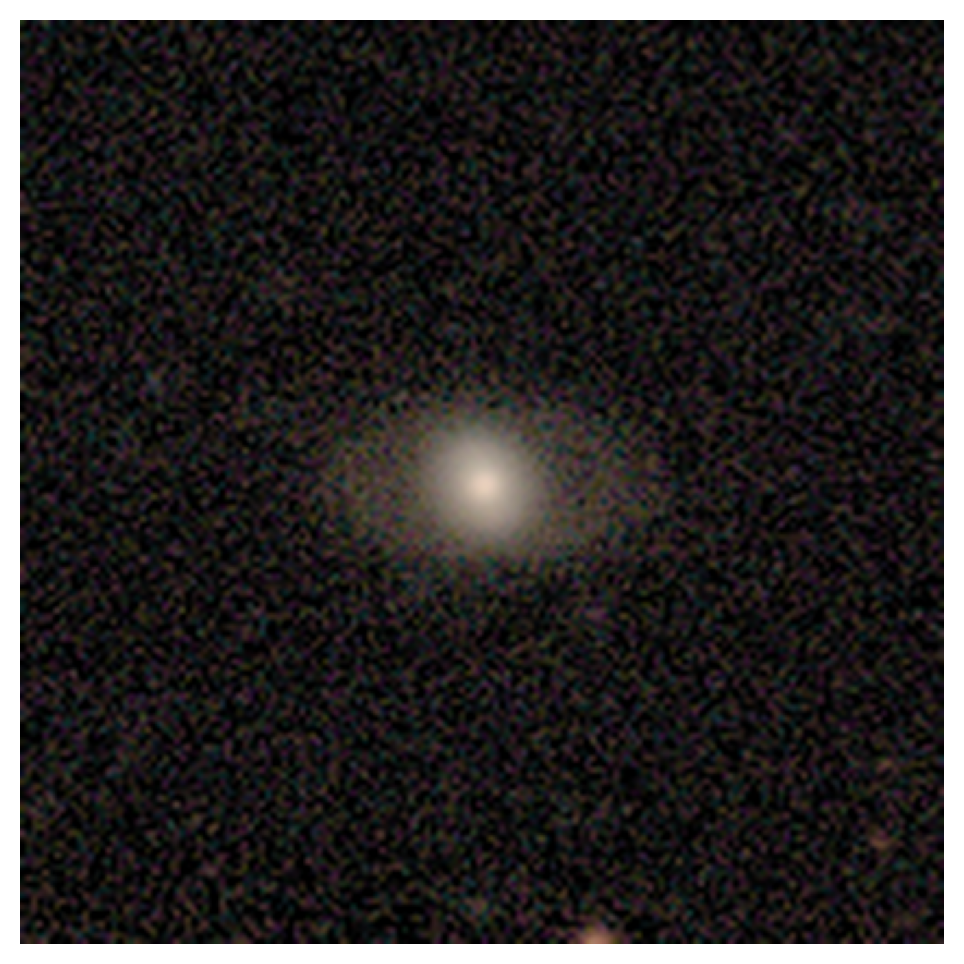

iauname: J040017.77-061813.3
ra: 60.07405039991498
dec: -6.303706987910627
smooth-or-featured_smooth_fraction: 0.656953391835661
has-spiral-arms_yes_fraction: 0.1722029892344805
The galaxy is likely elliptical.


In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

folder_path = '/content/drive/MyDrive/research/data/J040'


images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


if not images:
    print("No images found in the folder.")
else:

    random_image_path = random.choice(images)

    image = Image.open(random_image_path)
    plt.imshow(image)
    plt.axis('off') 
    plt.show()


    image_filename = os.path.basename(random_image_path)

    csv_path = '/content/drive/MyDrive/research/filtered_gz_decals_auto_posteriors.csv'
    df = pd.read_csv(csv_path)

    matched_row = df[df['file_loc'].str.endswith(image_filename)]

    if not matched_row.empty:

        properties_to_display = ['iauname', 'ra', 'dec', 'smooth-or-featured_smooth_fraction', 'has-spiral-arms_yes_fraction']
        for prop in properties_to_display:
            print(f"{prop}: {matched_row.iloc[0][prop]}")
    else:
        print("Matching row for the image not found in the CSV.")


smooth_fraction = matched_row['smooth-or-featured_smooth_fraction'].iloc[0]
spiral_arms_fraction = matched_row['has-spiral-arms_yes_fraction'].iloc[0]


smooth_threshold = 0.5  
spiral_threshold = 0.5  


if smooth_fraction > smooth_threshold:
    print("The galaxy is likely elliptical.")
elif spiral_arms_fraction > spiral_threshold:
    print("The galaxy is likely spiral.")
else:
    print("The galaxy classification is uncertain.")



# Linking CSV to PNG'S metdata

In [ ]:
import pandas as pd


csv_path = '/content/drive/MyDrive/research/filtered_gz_decals_auto_posteriors.csv'
df = pd.read_csv(csv_path)


df['file_loc'] = df['file_loc'].apply(lambda x: '/content/temp_extracted/' + x.replace('dr5/png/', ''))

print(df.head())  


               iauname                                           file_loc  \
0  J094651.40-010228.5  /content/temp_extracted/J094/J094651.40-010228...   
1  J094630.85-004554.5  /content/temp_extracted/J094/J094630.85-004554...   
2  J094631.59-005917.7  /content/temp_extracted/J094/J094631.59-005917...   
3  J094744.18-004013.4  /content/temp_extracted/J094/J094744.18-004013...   
4  J094751.74-003242.0  /content/temp_extracted/J094/J094751.74-003242...   

           ra       dec  smooth-or-featured_smooth_fraction  \
0  146.714215 -1.041280                            0.285737   
1  146.628585 -0.765162                            0.493212   
2  146.631706 -0.988347                            0.899878   
3  146.934129 -0.670405                            0.772967   
4  146.963500 -0.544776                            0.529303   

   smooth-or-featured_featured-or-disk_fraction  has-spiral-arms_yes_fraction  \
0                                      0.682081                      0.193613

In [ ]:
import os


df['exists'] = df['file_loc'].apply(os.path.exists)
df_filtered = df[df['exists']]

print(f"Filtered rows with existing files: {len(df_filtered)}")


Filtered rows with existing files: 0


In [ ]:
if len(df_filtered) > 0:
    print(f"Dataset contains {len(df_filtered)} records.")
else:
    print("Dataset is empty. Check the file paths and existence of files.")


Dataset is empty. Check the file paths and existence of files.


In [ ]:

df['file_loc'] = df['file_loc'].apply(lambda x: x.replace('dr5/png/', '').replace('/content/temp_extracted/', ''))
df['file_loc'] = '/content/temp_extracted/' + df['file_loc']


print(df['file_loc'].head())


0    /content/temp_extracted/J094/J094651.40-010228...
1    /content/temp_extracted/J094/J094630.85-004554...
2    /content/temp_extracted/J094/J094631.59-005917...
3    /content/temp_extracted/J094/J094744.18-004013...
4    /content/temp_extracted/J094/J094751.74-003242...
Name: file_loc, dtype: object


In [ ]:
df['exists'] = df['file_loc'].apply(os.path.exists)
df_filtered = df[df['exists']]

print(f"Filtered rows with existing files: {len(df_filtered)}")


Filtered rows with existing files: 0


In [ ]:
def parse_function(filename, label):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.image.decode_png(image_string, channels=3)

    return image_decoded, label


threshold = 0.5
binary_labels = (df_filtered['has-spiral-arms_yes_fraction'] > threshold).astype(int)


filenames = df_filtered['file_loc'].values
dataset = tf.data.Dataset.from_tensor_slices((filenames, binary_labels))
dataset = dataset.map(parse_function)


In [ ]:

dataset = dataset.shuffle(buffer_size=len(df_filtered))

train_size = int(0.7 * len(df_filtered))
val_size = int(0.2 * len(df_filtered))
test_size = len(df_filtered) - train_size - val_size

train_dataset = dataset.take(train_size)
test_val_dataset = dataset.skip(train_size)
val_dataset = test_val_dataset.take(val_size)
test_dataset = test_val_dataset.skip(val_size)

BATCH_SIZE = 16
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


InvalidArgumentError: {{function_node __wrapped__ShuffleDatasetV3_device_/job:localhost/replica:0/task:0/device:CPU:0}} buffer_size must be greater than zero or UNKNOWN_CARDINALITY [Op:ShuffleDatasetV3] name: 

# Data preperation for training:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

In [ ]:

csv_path = '/content/drive/MyDrive/research/filtered_gz_decals_auto_posteriors.csv'
df = pd.read_csv(csv_path)

threshold = 0.5
df['label'] = (df['has-spiral-arms_yes_fraction'] > threshold).astype(int)

df['file_loc'] = df['file_loc'].apply(lambda x: '/content/temp_extracted/' + x.replace('dr5/png/', ''))
df_filtered = df[df['file_loc'].apply(os.path.exists)]


def parse_function(filename, label):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.image.decode_png(image_string, channels=3)
    image_resized = tf.image.resize(image_decoded, [106, 106])
    return image_resized / 255.0, label

filenames = df_filtered['file_loc'].values
labels = df_filtered['label'].values

dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
dataset = dataset.map(parse_function)

total_size = len(df_filtered)
train_size = int(0.7 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

dataset = dataset.shuffle(total_size)
train_dataset = dataset.take(train_size).batch(16).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = dataset.skip(train_size).take(val_size).batch(16).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = dataset.skip(train_size + val_size).batch(16).prefetch(tf.data.experimental.AUTOTUNE)


In [ ]:
def ConvBlock(layers, model, filters):
    for i in range(layers):
        model.add(ZeroPadding2D((1,1)))  
        model.add(Conv2D(filters, (3, 3), activation='relu'))  
    model.add(MaxPooling2D((2,2), strides=(2,2)))

def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

def VGG_16():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(106, 106, 3))) # Spremeni v 420 v 106
    ConvBlock(1, model, 64)  
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)

    model.add(Dense(1, activation='sigmoid'))

    return model



optimizer = Adam(lr=1e-4)
model = VGG_16()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
import os
import pandas as pd
import tensorflow as tf

class DataGetter:

    def __init__(self, csv_path, base_img_path):
        self.csv_path = csv_path
        self.base_img_path = base_img_path
        self.df = pd.read_csv(csv_path)

    
        threshold = 0.5
        self.df['label'] = (self.df['has-spiral-arms_yes_fraction'] > threshold).astype(int)

     
        self.df['file_loc'] = self.df['file_loc'].apply(lambda x: os.path.join(base_img_path, x.replace('dr5/png/', '')))

   
        self.df = self.df[self.df['file_loc'].apply(os.path.exists)]

    def get_dataset(self, split='train', img_size=(106, 106), batch_size=16):
        """
        Returns a TensorFlow dataset for the specified split ('train', 'val', 'test').
        """
        if split not in ['train', 'val', 'test']:
            raise ValueError("Split must be 'train', 'val', or 'test'")


        total_size = len(self.df)
        train_size = int(0.7 * total_size)
        val_size = int(0.2 * total_size)

        if split == 'train':
            ds_df = self.df[:train_size]
        elif split == 'val':
            ds_df = self.df[train_size:train_size + val_size]
        else:  
            ds_df = self.df[train_size + val_size:]

        def parse_function(filename, label):
            image_string = tf.io.read_file(filename)
            image_decoded = tf.image.decode_png(image_string, channels=3)
            image_resized = tf.image.resize(image_decoded, img_size)
            return image_resized / 255.0, label

        filenames = ds_df['file_loc'].values
        labels = ds_df['label'].values

        dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
        dataset = dataset.map(parse_function).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

        return dataset


In [ ]:
import tensorflow as tf

def process_images_tf(paths):
    """
    Import images at 'paths', decode, resize to 106x106, and prepare for batching.
    TensorFlow operations are used to ensure compatibility with TensorFlow dataset pipelines.
    """
    def parse_image(path):

        image_string = tf.io.read_file(path)

        image_decoded = tf.image.decode_png(image_string, channels=3)

        image_resized = tf.image.resize(image_decoded, [106, 106])

        image_normalized = image_resized / 255.0
        return image_normalized

    paths_dataset = tf.data.Dataset.from_tensor_slices(paths)

    images_dataset = paths_dataset.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    return images_dataset



In [ ]:

example_image_path = df_filtered['file_loc'].iloc[0]


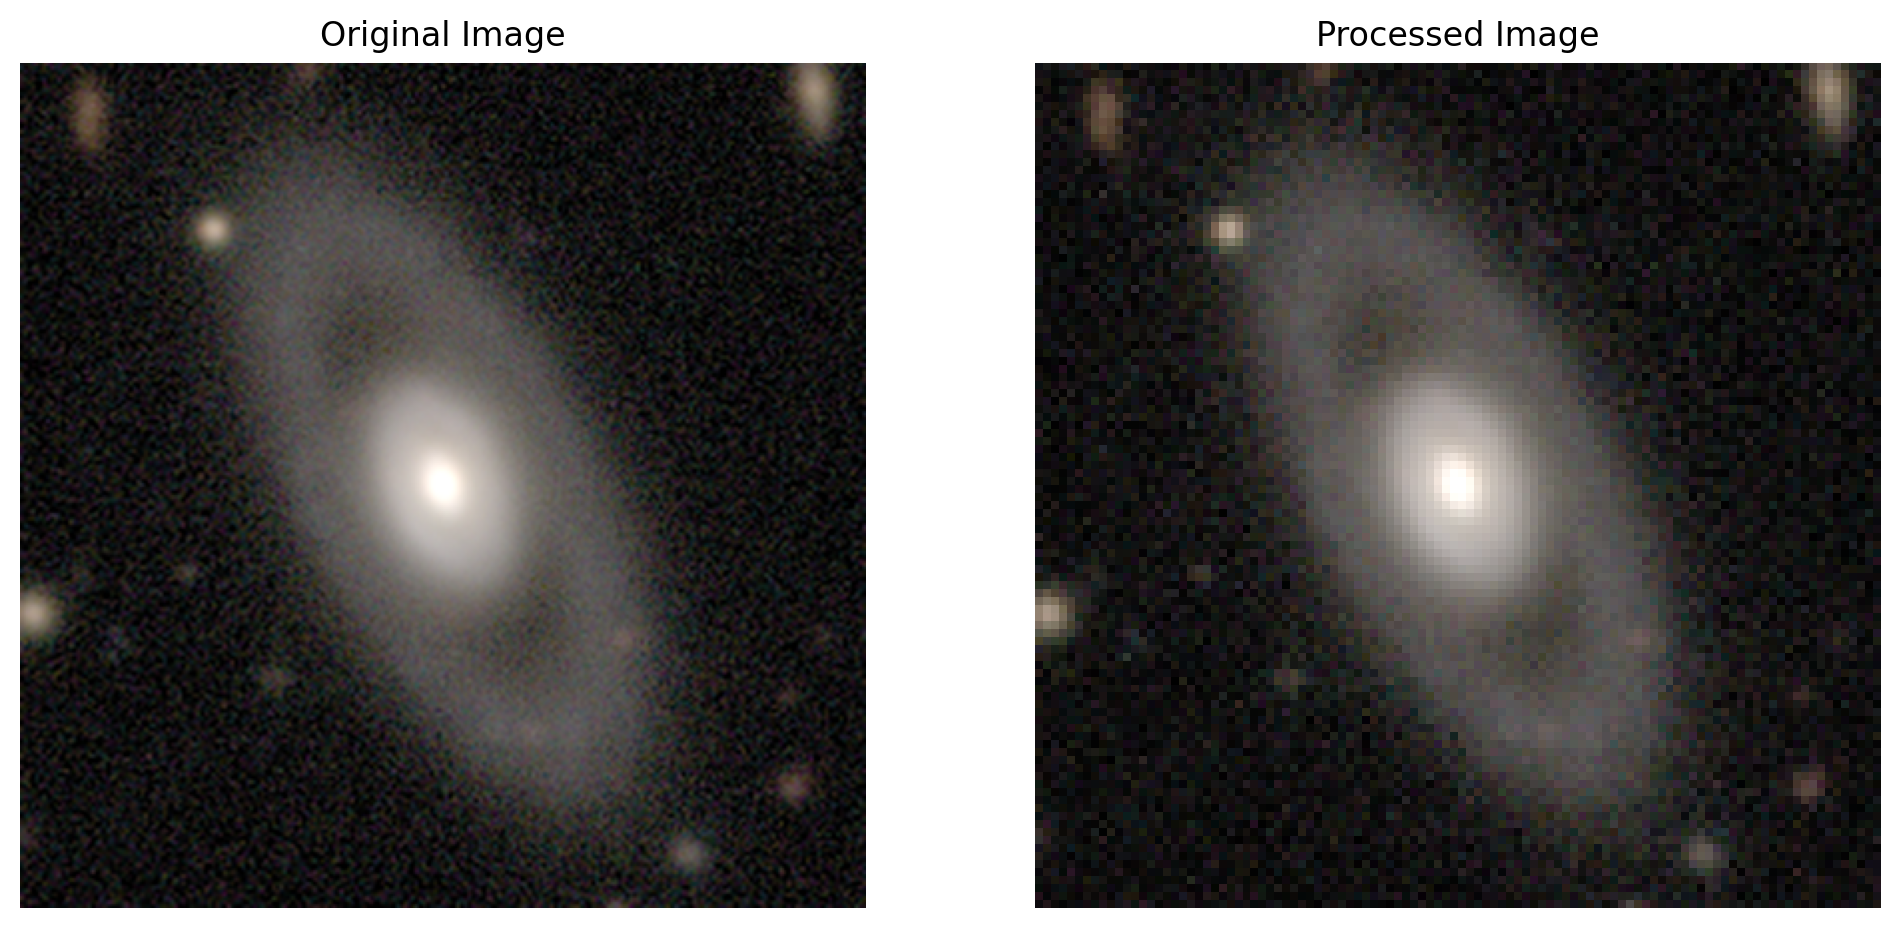

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf


def load_and_preprocess_image(path, target_size=(106, 106)):

    img = tf.io.read_file(path)

    img = tf.image.decode_png(img, channels=3)

    img_resized = tf.image.resize(img, target_size)

    img_normalized = img_resized / 255.0
    return img.numpy().astype("uint8"), img_normalized.numpy()

example_image_path = df_filtered['file_loc'].iloc[0]

original_img, processed_img = load_and_preprocess_image(example_image_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_img)
plt.title("Processed Image")
plt.axis('off')

plt.show()


In [ ]:
import tensorflow as tf

def process_images_tf(paths):
    """
    Reads images from given paths, decodes, resizes to a target size, and normalizes pixel values.

    Args:
    - paths: List of paths to the image files.

    Returns:
    - A batch of processed images.
    """
    def parse_image(path):
  
        image_string = tf.io.read_file(path)
        
        image_decoded = tf.image.decode_png(image_string, channels=3)
       
        image_resized = tf.image.resize(image_decoded, [106, 106])
  
        image_normalized = image_resized / 255.0
        return image_normalized

   
    paths_dataset = tf.data.Dataset.from_tensor_slices(paths)
    images_dataset = paths_dataset.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)


    images_batch = images_dataset.batch(len(paths))

    return images_batch

def custom_generator(df, batch_size=32):
    """
    Custom generator that yields batches of images and labels
    for training or validation.
    """
    while True:  
        df = df.sample(frac=1).reset_index(drop=True)

        for offset in range(0, len(df), batch_size):
            batch_samples = df.iloc[offset:offset+batch_size]

            images = []
            labels = []

            for _, row in batch_samples.iterrows():
                file_path = row['file_loc']
                label = row['label']

      
                image_dataset = process_images_tf([file_path])
       
                labels.append(label)

            y_train = tf.convert_to_tensor(labels, dtype=tf.float32)

            yield image_dataset, y_train



# Training:

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback


In [ ]:
class LossHistory(Callback):
    def on_train_begin(self, logs=None):
        self.losses = []
        self.val_losses = []

    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')

checkpoint_dir = '/content/tmp'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpointer = ModelCheckpoint(filepath=f'{checkpoint_dir}/weights.hdf5', verbose=1, save_best_only=True)


In [ ]:

model = tf.keras.models.load_model(f'{checkpoint_dir}/weights.hdf5')


OSError: No file or directory found at /content/tmp/weights.hdf5

In [ ]:

steps_per_epoch = len(train_dataset) // batch_size
validation_steps = len(val_dataset) // batch_size


history = model.fit(
    train_dataset,
    epochs=50,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    verbose=2,
    callbacks=[LossHistory(), checkpointer, early_stopping]
)

